In [1]:
import pandas as pd
import numpy as np
import os
import re
import glob
import numpy.ma as ma
import matplotlib.pyplot as plt
import matplotlib.patches as Rectangle
import seaborn as sns

from helper_functions import load_48_aa, load_vt_aa, ttplot

In [2]:
VT_FILE_PATH = 'data_files/VT_unfiltered_Feb.txt'
HD_48_FILE_PATH = r'C:\Users\shary\Github\gesar-file-utility\data_files\unzipped_files'

In [3]:
df_vt = load_vt_aa(VT_FILE_PATH, True, 3)

Length before trimming and(or) combining 3095530
Length after trimming and(or) combining 156692
Reliability check of 3 removed 22014 sequences


In [4]:
df_48 = load_48_aa(HD_48_FILE_PATH, True, 3)

File Name: 20180222-24NYooVH-VG.txt
Length of file before trimming and(or) combining: 3047
Length of file after trimming and(or) combining: 1646
Reliability check of 3 removed 1272 sequences
File Name: 20180222-24NYsaVH-VG.txt
Length of file before trimming and(or) combining: 438899
Length of file after trimming and(or) combining: 33517
Reliability check of 3 removed 21690 sequences
File Name: 20180222-24OOooVH-VG.txt
Length of file before trimming and(or) combining: 2970
Length of file after trimming and(or) combining: 1444
Reliability check of 3 removed 1049 sequences
File Name: 20180222-24OOsaVH-VG.txt
Length of file before trimming and(or) combining: 384305
Length of file after trimming and(or) combining: 11962
Reliability check of 3 removed 4444 sequences
File Name: 20180222-24WIooVH-VG.txt
Length of file before trimming and(or) combining: 4830
Length of file after trimming and(or) combining: 2484
Reliability check of 3 removed 1919 sequences
File Name: 20180222-24WIooVL-VG.txt
Le

In [9]:
# Remov sequences that contain wild card characters like *
filter_48 = df_48.index.str.contains('\*')
filter_vt = df_vt.index.str.contains('\*')

filtered_48_df = df_48[~filter_48]
filtered_vt_df = df_vt[~filter_vt]

# Remove indexes of len < 4 in 48 hd files:

filter_len = np.where(filtered_48_df.index.str.len() == 4)
filtered_48_df = filtered_48_df.iloc[filter_len]

filter_len = np.where(filtered_vt_df.index.str.len() == 4)
filtered_vt_df = filtered_vt_df.iloc[filter_len]

# Remove any squences contain a sequence call lank that comes from blank!
# filtered_48_df = filtered_48_df.drop(index='lank')

# df_vt = df_vt.iloc[1:, :] # removes first row that is empty of any amino acids

In [10]:
intersecting_aa = filtered_vt_df.index.intersection(filtered_48_df.index)

# Create new dfs that only show intersecting nucelotides:

df_48_itx = filtered_48_df.loc[intersecting_aa, :]
df_vt_itx = filtered_vt_df.loc[intersecting_aa, :]

cols_vt = list(filtered_vt_df.columns)
cols_48 = list(filtered_48_df.columns)

In [11]:
intersecting_aa

Index(['AAAA', 'AAAC', 'AAAD', 'AAAE', 'AAAF', 'AAAG', 'AAAH', 'AAAK', 'AAAL',
       'AAAM',
       ...
       'YYWP', 'YYWY', 'YYYA', 'YYYD', 'YYYG', 'YYYK', 'YYYN', 'YYYQ', 'YYYS',
       'YYYY'],
      dtype='object', name='AA', length=78712)

In [18]:
# EQUALS Columns Approach
corr_dict = {}

for col_1 in col_vt:
    for col_2 in col_48:
        corr_dict[(col_1,col_2)] = equal_cols(df_48_itx[col_2],df_vt_itx[col_1])
        
corr_dict_keys = []
corr_tuple = []

for key, val in corr_dict.items():
    corr_dict_keys.append(key)
    corr_tuple.append(val)

corr_equals_df = pd.DataFrame(corr_tuple,
                            index=corr_dict_keys, columns=['Positive', 'Negative', 'Proportion'])


In [24]:
corr_equals_df.sort_values(by='Proportion', ascending=False)

,Positive,Negative,Proportion
"(VT3, 20180222-71WIooPA-VV__R2F19_RN2RP2)",76969,1743,0.977856
"(VT3, 20180222-71WIooPA-VV__R2F20_RN2RP3)",76963,1749,0.977780
"(VT3, 20180222-71WIooPA-VV__R2F18_RN2RP1)",76963,1749,0.977780
"(VT5, 20180222-71WIooPA-VV__R2F19_RN2RP2)",76939,1773,0.977475
"(VT5, 20180222-71WIooPA-VV__R2F18_RN2RP1)",76932,1780,0.977386
...,...,...,...
"(VT20, 20180222-71OOsaSL-VV__R2F11_RN2RP1)",9180,69532,0.116628
"(VT20, 20180222-71OOsaSL-VV__R2F13_RN2RP3)",9173,69539,0.116539
"(VT20, 20180222-24WIsaVL-VG__R3F14_RN1RP3)",9151,69561,0.116259
"(VT20, 20180222-24NYsaVH-VG__R3F17_RN1RP3)",9128,69584,0.115967


In [21]:
# Masked EQUALS Columns Approach
corr_dict = {}

for col_1 in col_vt:
    for col_2 in col_48:
        corr_dict[(col_1,col_2)] = equals_cols_masked(df_48_itx[col_2],df_vt_itx[col_1])
        
corr_dict_keys = []
corr_tuple = []

for key, val in corr_dict.items():
    corr_dict_keys.append(key)
    corr_tuple.append(val)

corr_equals_masked_df = pd.DataFrame(corr_tuple,
                            index=corr_dict_keys, columns=['Positive', 'Negative', 'Proportion'])

In [25]:
corr_equals_masked_df.sort_values(by='Positive', ascending=False)

,Positive,Negative,Proportion
"(VT23, 20180222-57NYooVH-VT__R7F2_RN1RP3)",13815,54209,0.203090
"(VT24, 20180222-57NYooVH-VT__R7F2_RN1RP3)",13786,54415,0.202138
"(VT24, 20180222-57OOsaVH-VT__R6F11_RN1RP1)",13727,55179,0.199213
"(VT23, 20180222-57OOsaVH-VT__R6F11_RN1RP1)",13566,55359,0.196823
"(VT26, 20180222-57NYooVH-VT__R7F2_RN1RP3)",13556,54203,0.200062
...,...,...,...
"(VT10, 20180222-24WIooVH-VG__R5F11_RN1RP2)",0,2239,0.000000
"(VT10, 20180222-24WIooVL-VG__R9F2_RN1RP1)",0,2115,0.000000
"(VT10, 20180222-24WIooVL-VG__R9F3_RN1RP2)",0,2101,0.000000
"(VT10, 20180222-24WIooVL-VG__R9F4_RN1RP3)",0,2125,0.000000


In [27]:
# Custom Difference Metric
corr_dict = {}

for col_1 in col_vt:
    for col_2 in col_48:
        corr_dict[(col_1,col_2)] = custom_diff_metric(df_48_itx[col_2],df_vt_itx[col_1])
        
corr_dict_keys = []
corr_tuple = []

for key, val in corr_dict.items():
    corr_dict_keys.append(key)
    corr_tuple.append(val)

custom_diff_df = pd.DataFrame(corr_tuple,
                            index=corr_dict_keys, columns=['Custom_Difference', 'Matched_Rows'])

In [29]:
custom_diff_df.sort_values(by='Custom_Difference', ascending=True)

,Custom_Difference,Matched_Rows
"(VT23, 20180222-57NYooVH-VT__R6F20_RN1RP1)",67.411201,67351
"(VT24, 20180222-57NYooVH-VT__R6F20_RN1RP1)",67.988835,67488
"(VT24, 20180222-57NYsaVH-VT__R6F9_RN1RP2)",68.114414,67892
"(VT26, 20180222-57NYooVH-VT__R6F20_RN1RP1)",68.153843,67057
"(VT23, 20180222-57NYooVH-VT__R7F1_RN1RP2)",68.158556,67766
...,...,...
"(VT50, 20180222-24WIooVH-VG__R5F10_RN1RP1)",904.931341,37296
"(VT38, 20180222-24OOsaVH-VG__R3F18_RN1RP1)",908.408644,34802
"(VT42, 20180222-24OOsaVH-VG__R3F20_RN1RP3)",919.419225,34742
"(VT38, 20180222-24OOsaVH-VG__R3F20_RN1RP3)",921.674153,31853


## 20x20 Approach

1. Create 20x20 plots for 48hd files
2. Create 20x20 plots for vt_unfiltered -> one for each column

In [98]:
for col in list(filtered_48_df_len.columns):
    plot_48 = ttplot(filtered_48_df_len[col].index.values, filtered_48_df_len[col].values, title=f'20x20 Plot {col}')
    plot_48.tight_layout()
    plot_48.savefig(f'plots-20/20x20-{col}.png')
    plot_48.clear()

<Figure size 648x432 with 0 Axes>

In [73]:
for col in list(filtered_vt_df.columns):
    plot_vt = ttplot(filtered_vt_df[col].index.values, filtered_vt_df[col].values, title=f'20x20 Plot {col}')
    plot_vt.tight_layout()
    plot_vt.savefig(f'plots-20/20x20-{col}.png')
    plot_vt.clear()

<Figure size 648x432 with 0 Axes>

In [26]:
def custom_diff_metric(df_48,df_vt):
    """ Creates a custom correlation based on masked values within given arrays"""
    # Use for df_vt and df_48 comparision

    a_masked = ma.masked_values(df_48, 0)
    b_masked = ma.masked_values(df_vt, 0)

    # this ensures that the mask is only applied when both columns are 0 for a given seq
    new_mask = np.logical_and(a_masked.mask, b_masked.mask)

    # update masks:
    a_masked.mask = new_mask
    b_masked.mask = new_mask

    c = ma.absolute(ma.subtract(a_masked, b_masked))
    d = ma.divide(c, b_masked)
    d = ma.mean(d)*100

    return d, c.count()

def equal_cols(col_48_1, col_vt_1):
    # Count equals in two columns. Return a tuple with: (count true, count false, count true/total)
    bool_count = np.equal(col_48_1, col_vt_1)
    positive_count = np.sum(bool_count)
    negative_count = len(bool_count) - positive_count
    positive_proportion = positive_count / len(bool_count)

    return positive_count, negative_count, positive_proportion


def equals_cols_masked(col_48_1, col_vt_1):
    a_masked = ma.masked_values(col_48_1, 0)
    b_masked = ma.masked_values(col_vt_1, 0)

    # this ensures that the mask is only applied when both columns are 0 for a given seq
    new_mask = np.logical_and(a_masked.mask, b_masked.mask)

    # update masks:
    a_masked.mask = new_mask
    b_masked.mask = new_mask

    # bool_count = ma.equal(a_masked, b_masked)
    bool_count = np.isclose(a_masked, b_masked, rtol=0.2, atol=0)
    positive_count = bool_count.sum()
    negative_count = bool_count.count() - positive_count
    positive_proportion = positive_count / bool_count.count()

    return positive_count, negative_count, positive_proportion

## Untruncated Approach

Do the same comparison as before but without truncation

In [3]:
df_vt = load_vt_aa(VT_FILE_PATH, False, 0)
df_48 = load_48_aa(HD_48_FILE_PATH, False, 0)

Length before trimming and(or) combining 3095530
Length after trimming and(or) combining 2167078
File Name: 20180222-24NYooVH-VG.txt
Length of file before trimming and(or) combining: 3047
Length of file after trimming and(or) combining: 2282
File Name: 20180222-24NYsaVH-VG.txt
Length of file before trimming and(or) combining: 438899
Length of file after trimming and(or) combining: 414633
File Name: 20180222-24OOooVH-VG.txt
Length of file before trimming and(or) combining: 2970
Length of file after trimming and(or) combining: 2152
File Name: 20180222-24OOsaVH-VG.txt
Length of file before trimming and(or) combining: 384305
Length of file after trimming and(or) combining: 382101
File Name: 20180222-24WIooVH-VG.txt
Length of file before trimming and(or) combining: 4830
Length of file after trimming and(or) combining: 3473
File Name: 20180222-24WIooVL-VG.txt
Length of file before trimming and(or) combining: 3563
Length of file after trimming and(or) combining: 2692
File Name: 20180222-24WIs

In [4]:
# Remov sequences that contain wild card characters like *
filter_48 = df_48.index.str.contains('\*')
filter_vt = df_vt.index.str.contains('\*')

filtered_48_df = df_48[~filter_48]
filtered_vt_df = df_vt[~filter_vt]

# Remove indexes of len < 3 in both 48hd and vt_unfiltered matrix

filter_len = np.where(filtered_48_df.index.str.len() >= 3)
filtered_48_df = filtered_48_df.iloc[filter_len]

filter_len = np.where(filtered_vt_df.index.str.len() >= 3)
filtered_vt_df = filtered_vt_df.iloc[filter_len]

# Remove any squences contain a sequence call lank that comes from blank!
# filtered_48_df = filtered_48_df.drop(index='lank')

# df_vt = df_vt.iloc[1:, :] # removes first row that is empty of any amino acids

In [5]:
filtered_vt_df

,VT1,VT2,VT3,VT4,VT5,VT6,VT7,VT8,VT9,VT10,...,VT41,VT42,VT43,VT44,VT45,VT46,VT47,VT48,VT49,VT50
AA,,,,,,,,,,,,,,,,,,,,,
DKLLFAIPLVVPFYSHSSGAEIFIVGGG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
DKLLFAIPLVVPFYSHSSLTAFGGG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DKLLFAIPLVVPFYSHSSPAGPGGG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DKLLFGIPLVVPFYSHSSQQAQGGG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EELLFAIPLVVPFYSHSSKCFMYCGGG,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YKLLFAIPLVVPFYSHSSIIAYGGG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
YKLLFAIPLVVPFYSHSSLLISRHSGGG,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
YKLLFAIPLVVPFYSHSSLYDLYHGGG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
filtered_48_df

,20180222-24NYooVH-VG__R9F5_RN1RP1,20180222-24NYooVH-VG__R9F6_RN1RP2,20180222-24NYooVH-VG__R9F8_RN1RP3,20180222-24NYsaVH-VG__R3F15_RN1RP1,20180222-24NYsaVH-VG__R3F16_RN1RP2,20180222-24NYsaVH-VG__R3F17_RN1RP3,20180222-24OOooVH-VG__R9F9_RN1RP1,20180222-24OOooVH-VG__R9F10_RN1RP2,20180222-24OOooVH-VG__R9F11_RN1RP3,20180222-24OOsaVH-VG__R3F18_RN1RP1,...,20180222-71OOsaSL-VV__R2F13_RN2RP3,20180222-71WIooPA-VV__R2F18_RN2RP1,20180222-71WIooPA-VV__R2F19_RN2RP2,20180222-71WIooPA-VV__R2F20_RN2RP3,20180222-71WIsaSL-VV__R2F1_RN2RP1,20180222-71WIsaSL-VV__R2F2_RN2RP2,20180222-71WIsaSL-VV__R2F3_RN2RP3,20180222-71WIsaSV-VV__R2F4_RN2RP1,20180222-71WIsaSV-VV__R2F5_RN2RP2,20180222-71WIsaSV-VV__R2F6_RN2RP3
AA,,,,,,,,,,,,,,,,,,,,,
AAGRAGCGGGAAAPGGSARGPCDSPSSYCRSGW,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CAASGRR,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CFVFG,1.0,1.0,6.0,2.0,3.0,0.0,7.0,3.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CLESC,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CLESS,13.0,10.0,11.0,14.0,23.0,9.0,8.0,16.0,10.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YTPWLPPN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
YTVYQPTQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
YVAYSIRG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [7]:
intersecting_aa = filtered_vt_df.index.intersection(filtered_48_df.index)

# Create new dfs that only show intersecting nucelotides:

df_48_itx = filtered_48_df.loc[intersecting_aa, :]
df_vt_itx = filtered_vt_df.loc[intersecting_aa, :]

cols_vt = list(filtered_vt_df.columns)
cols_48 = list(filtered_48_df.columns)

In [8]:
intersecting_aa

Index([], dtype='object', name='AA')

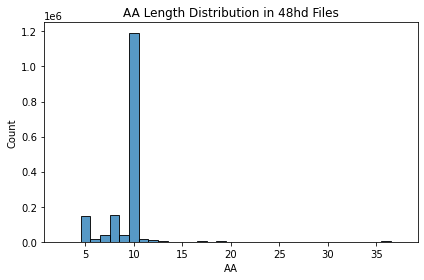

In [18]:
sns.histplot(filtered_48_df.index.str.len(), stat='count', discrete=True).set_title('AA Length Distribution in 48hd Files')
plt.tight_layout()
plt.savefig('aa_length_distrib_48hd.png')

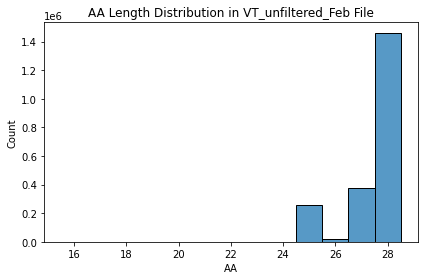

In [19]:
sns.histplot(filtered_vt_df.index.str.len(), stat='count', discrete=True, ).set_title('AA Length Distribution in VT_unfiltered_Feb File')
plt.tight_layout()
plt.savefig('aa_length_distrib_vt.png')